# Model Training

### Importing required packages

In [1]:
# Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
import xgboost as xgb 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import warnings

In [2]:
# importing dataset
df = pd.read_csv(r'C:\projects\mlproject2\NOTEBOOK\Clean_Dataset.xls')

In [3]:
df.head(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
# dropping columns 'Unnamed: 0' and 'flights'
df.drop(['Unnamed: 0','flight'],axis=1,inplace=True)

In [6]:
# # storing the Dependent Variables in X and Independent Variable in Y
X = df.drop(['price'],axis=1)

In [7]:
X.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 20.6+ MB


In [9]:
y = df['price']

In [10]:
y

0          5953
1          5953
2          5956
3          5955
4          5955
          ...  
300148    69265
300149    77105
300150    79099
300151    81585
300152    81585
Name: price, Length: 300153, dtype: int64

In [11]:
# identifying numerical and categorical features
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

In [12]:
num_features

Index(['duration', 'days_left'], dtype='object')

In [13]:
cat_features

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class'],
      dtype='object')

In [15]:
print("Categories in 'airline' variable:     ",end=" " )
print(df['airline'].unique())

print("Categories in 'source_city' variable:  ",end=" ")
print(df['source_city'].unique())

print("Categories in'departure_time' variable:",end=" " )
print(df['departure_time'].unique())

print("Categories in 'stops' variable:     ",end=" " )
print(df['stops'].unique())

print("Categories in 'arrival_time' variable:     ",end=" " )
print(df['arrival_time'].unique())

print("Categories in 'destination_city' variable:     ",end=" " )
print(df['destination_city'].unique())

print("Categories in 'class' variable:     ",end=" " )
print(df['class'].unique())

Categories in 'airline' variable:      ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
Categories in 'source_city' variable:   ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
Categories in'departure_time' variable: ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
Categories in 'stops' variable:      ['zero' 'one' 'two_or_more']
Categories in 'arrival_time' variable:      ['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
Categories in 'destination_city' variable:      ['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
Categories in 'class' variable:      ['Economy' 'Business']


In [17]:
print("Categories in 'days left' variable:     ",end=" " )
print(df['days_left'].unique())

print("Categories in 'duration' variable:     ",end=" " )
print(df['duration'].unique())

Categories in 'days left' variable:      [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49]
Categories in 'duration' variable:      [ 2.17  2.33  2.25  2.08 12.25 16.33 11.75 14.5  15.67  3.75  2.5   5.83
  8.    6.   14.67 16.17 18.   23.17 24.17  8.83  4.5  15.25 11.   19.08
 22.83 26.42 17.75 19.58 26.67 15.17 20.83 11.42 22.25 26.   21.75  3.83
  4.42  7.67  8.33 10.42 23.75 19.5   6.5  12.42 21.08 28.17 28.25  9.25
 17.92  7.08 13.83  7.58 15.83 24.42  4.17  4.25  5.08 29.33 17.   27.17
 24.75  5.75 12.75 13.75 17.83  5.5  23.83  5.   26.5  12.83  8.92 11.17
 12.17 15.58 15.75  7.92 13.25 16.   22.75  6.33  7.25 30.08 18.25  6.08
  2.   12.33  3.5  10.25 14.17 25.58  4.08  9.75  6.67  9.67 10.08 12.58
  7.    8.25 15.5  10.17 23.5  25.75 11.5  21.42 14.25  7.75  5.33  5.67
  4.75 19.33  6.25 10.33  9.08 15.42  4.83 25.83  7.5  27.58 28.42  6.42
 24.58 16.5  11.33 24.83 14.92 26.08  

In [16]:
# Create column transformer with 3 types of transformers
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor= ColumnTransformer(
    [
        ('StandardScaler',numerical_transformer,num_features),
        ('OneHotEncoding',categorical_transformer,cat_features)
    ]
)

In [17]:
X = preprocessor.fit_transform(X)

In [18]:
X.shape

(300153, 37)

In [19]:
# Splitting the Data into Training set and Testing Set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

print('shape of X_train : {}'.format(X_train.shape))
print('shape of X_test : {}'.format(X_test.shape))
print('shape of y_train : {}'.format(y_train.shape))
print('shape of y_test : {}'.format(y_test.shape))

shape of X_train : (210107, 37)
shape of X_test : (90046, 37)
shape of y_train : (210107,)
shape of y_test : (90046,)


### Creating an 'evaluate' Function to give all metrics after model Training

In [21]:
def evaluate_model(true,predicted):
    mse = mean_squared_error(true,predicted)
    mae = mean_absolute_error(true,predicted)
    rmse = np.sqrt(mean_squared_error(true,predicted))
    r2_scr = r2_score(true,predicted)
    return mse,mae,rmse,r2_scr

In [22]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "Elastic Net": ElasticNet(),
    "K-Neighbors Regressor": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(max_depth=100, min_samples_split=30, min_samples_leaf=10,random_state=42),
    "Bagging Regressor": BaggingRegressor(n_jobs=-1)
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)  # train model

    # make prediction
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # evaluate train and test dataset
    model_train_mse, model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train,y_train_pred)
    model_test_mse, model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Mean Squared Error: 45642721.2085
- Root Mean Squared Error: 6755.9397
- Mean Absolute Error: 4578.8899
- R2 Score: 0.9114
----------------------------------
Model performance for Test set
- Mean Squared Error: 45560814.8638
- Root Mean Squared Error: 6749.8752
- Mean Absolute Error: 4555.2318
- R2 Score: 0.9115


Lasso
Model performance for Training set
- Mean Squared Error: 45643265.3640
- Root Mean Squared Error: 6755.9800
- Mean Absolute Error: 4577.0852
- R2 Score: 0.9114
----------------------------------
Model performance for Test set
- Mean Squared Error: 45561763.7489
- Root Mean Squared Error: 6749.9455
- Mean Absolute Error: 4553.4405
- R2 Score: 0.9115


Ridge
Model performance for Training set
- Mean Squared Error: 45642726.9565
- Root Mean Squared Error: 6755.9401
- Mean Absolute Error: 4578.8105
- R2 Score: 0.9114
----------------------------------
Model performance for Test set
- Mean Squared Error: 45560793.8807
- 

# Results

In [23]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values

<bound method DataFrame.sort_values of               Model Name  R2_Score
0      Linear Regression  0.911475
1                  Lasso  0.911473
2                  Ridge  0.911475
3            Elastic Net  0.670570
4  K-Neighbors Regressor  0.971560
5          Decision Tree  0.982366
6      Bagging Regressor  0.983683>

# Linear Regression

In [24]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 91.15


# Plot y_pred and y_test

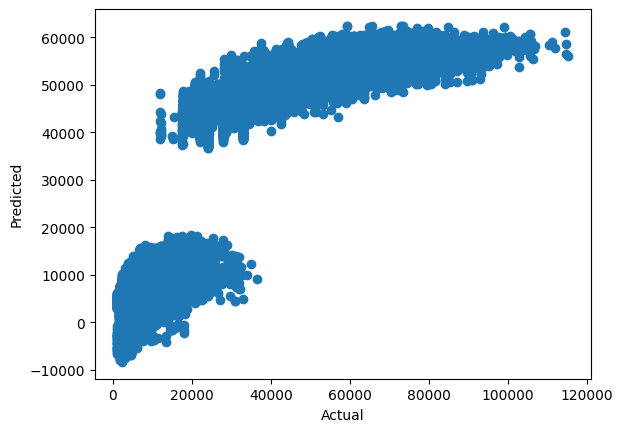

In [25]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

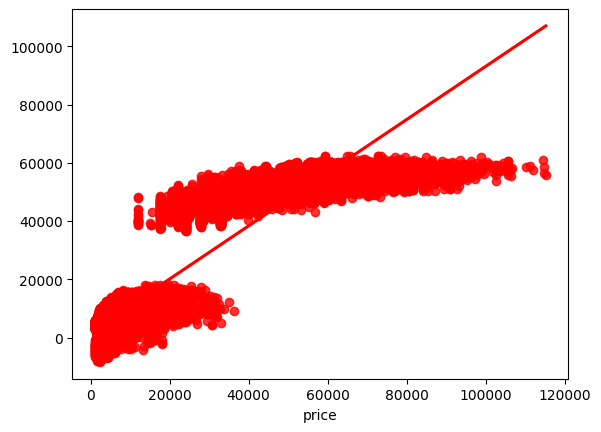

In [26]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');